# 2D Projective Transformations that Preserve the Unit Circle
It turns out that compositions of these four types of projective transformations preserve the unit circle:
1. Rotation
2. Flipping around an axis going through the origin
3. Hyperbolic rotation around the x axis
4. Hyperbolic rotation around the y axis 

This notebook will visualize the effect of these transformations on the 2D plane and 3D space. This way, we can visually verify that the unit circle is indeed preserved after the transformation.

In [1]:
import numpy as np

# Set alpha, beta, gamma, and delta as desired
alpha = 0.1
H1 = np.array([
    [np.cos(alpha), -np.sin(alpha), 0],
    [np.sin(alpha), np.cos(alpha), 0],
    [0, 0, 1]
])

beta = 0.2
H2 = np.array([
    [np.cos(beta), np.sin(beta), 0],
    [np.sin(beta), -np.cos(beta), 0],
    [0, 0, 1]
])

gamma = 0.3
H3 = np.array([
    [1, 0, 0],
    [0, np.cosh(gamma), np.sinh(gamma)],
    [0, np.sinh(gamma), np.cosh(gamma)]
])

delta = 0.4
H4 = np.array([
    [np.cosh(delta), 0, np.sinh(delta)],
    [0, 1, 0],
    [np.sinh(delta), 0, np.cosh(delta)]
])

# Create a composition matrix by matrix multiplication as desired
H = H3

In [2]:
def transform_2D(H, x, y):
    X, Y = np.meshgrid(x, y)
    Z = np.array([H @ [x, y, 1] for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z[:, :2] / Z[:, 2, np.newaxis]  # Divide by the third coordinate to get the new 2D coordinates
    U, V = Z[:, 0].reshape(X.shape), Z[:, 1].reshape(Y.shape)
    return X, Y, U, V

def transform_3D(H, X, Y, Z):
    U, V, W = np.zeros(X.shape), np.zeros(Y.shape), np.zeros(Z.shape)
    for i in range(X.shape[0]):
        vec = H @ [X[i], Y[i], Z[i]]
        U[i], V[i], W[i] = vec
    return U, V, W

def generate_sphere_points(num_points):
    indices = np.arange(0, num_points, dtype=float) + 0.5

    phi = (np.arccos(1 - 2*indices/num_points))
    theta = (np.pi * (1 + 5**0.5) * indices)

    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)

    z_filter = z >= 0

    return x[z_filter], y[z_filter], z[z_filter]

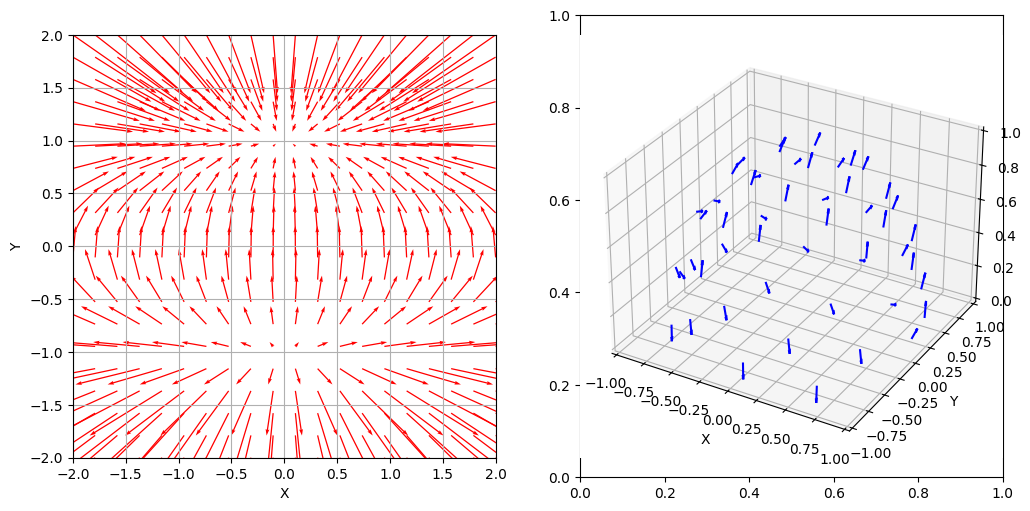

In [3]:
# Create a grid of 2D Cartesian coordinates
from matplotlib import pyplot as plt


x2 = np.linspace(-2, 2, 20)
y2 = np.linspace(-2, 2, 20)

# Apply the transformation to each point in the grid
X2, Y2, U2, V2 = transform_2D(H, x2, y2)

# Generate points on the upper hemisphere of the unit sphere
X3, Y3, Z3 = generate_sphere_points(100)
U3, V3, W3 = transform_3D(H, X3, Y3, Z3)

# Plot the original grid and the transformed grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].quiver(X2, Y2, U2-X2, V2-Y2, angles='xy', scale_units='xy', scale=1, color='r')
ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].grid()
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')  # Set aspect ratio to be equal

ax3d = fig.add_subplot(122, projection='3d')
ax3d.quiver(X3, Y3, Z3, U3-X3, V3-Y3, W3-Z3, color='b', length=0.1, normalize=True)
ax3d.set_xlim([-1, 1])
ax3d.set_ylim([-1, 1])
ax3d.set_zlim([0, 1])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.set_aspect('auto')

plt.show()